<a href="https://colab.research.google.com/github/RoaaM/music_classification/blob/main/classification_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

#read the dataset

In [ ]:
data_train = pd.read_csv('/content/train (1).csv')
data_test = pd.read_csv('/content/test (2).csv')

In [ ]:
data_train

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.235,152.429,204947.000000,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14392,NOISY,I Wish I Was A...,47.0,0.607,0.946,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,14393,BLOODSPOT,Deadline Story (feat. Patrick Boos),27.0,0.435,0.951,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,14394,Cold Years,Too Far Gone,22.0,0.415,0.941,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,14395,The Jaded Hearts Club,Reach Out I'll Be There,37.0,0.493,0.986,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


##summarize the data

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
data_train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
data_train['Class'].value_counts(ascending=True)

4      310
3      322
7      461
0      500
2     1018
1     1098
5     1157
8     1483
9     2019
6     2069
10    3959
Name: Class, dtype: int64

In [ ]:
data_train.groupby('Class').mean()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
Class,,,,,,,,,,,,,,,
0,7063.228000,38.195455,0.530466,0.439463,5.771812,-10.149606,0.804000,0.043989,0.580676,0.109438,0.147287,0.388546,118.895202,4.101821,3.894000
1,7214.010929,46.101207,0.538002,0.688784,5.989765,-7.729302,0.658470,0.067952,0.189024,0.198979,0.186545,0.506410,125.181969,224334.498179,3.948998
2,7118.203340,33.096326,0.561626,0.573651,6.165893,-9.077617,0.652259,0.060550,0.389249,0.096399,0.209352,0.610081,122.427574,248134.234774,3.830059
3,7115.198758,26.019355,0.497497,0.526979,5.562712,-10.143304,0.655280,0.078138,0.728095,0.136211,0.238048,0.629100,114.112481,4.847606,3.801242
4,6976.667742,56.766323,0.593961,0.602628,5.963636,-8.498868,0.935484,0.042307,0.313610,0.015513,0.168922,0.619455,123.732287,3.381314,3.938710
5,7354.164218,48.528484,0.724016,0.643204,5.915191,-7.475449,0.525497,0.240016,0.204467,0.060772,0.195989,0.548072,117.901328,206552.664650,3.987035
6,7245.682939,41.508600,0.550992,0.652035,6.124251,-8.234368,0.664572,0.067541,0.230709,0.265326,0.181865,0.490466,123.625856,227194.830836,3.944901
7,7344.557484,41.583710,0.427356,0.156317,5.716495,-18.737629,0.620390,0.044861,0.908020,0.750352,0.128377,0.226846,107.166783,4.164950,3.731020
8,7188.223196,42.023304,0.411686,0.876008,5.794834,-5.857826,0.592717,0.088433,0.027171,0.235799,0.231183,0.319123,127.768329,271536.306136,3.900202


##data analysis

In [ ]:
missing_value = data_train.isna().sum()
missing_value

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

##Handling missing data with ML model:


In [ ]:
mis_value_percent = 100 * data_train.isnull().sum() / len(data_train)
print(mis_value_percent)

Id                     0.000000
Artist Name            0.000000
Track Name             0.000000
Popularity             2.313143
danceability           0.000000
energy                 0.000000
key                   11.176716
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      24.597110
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64


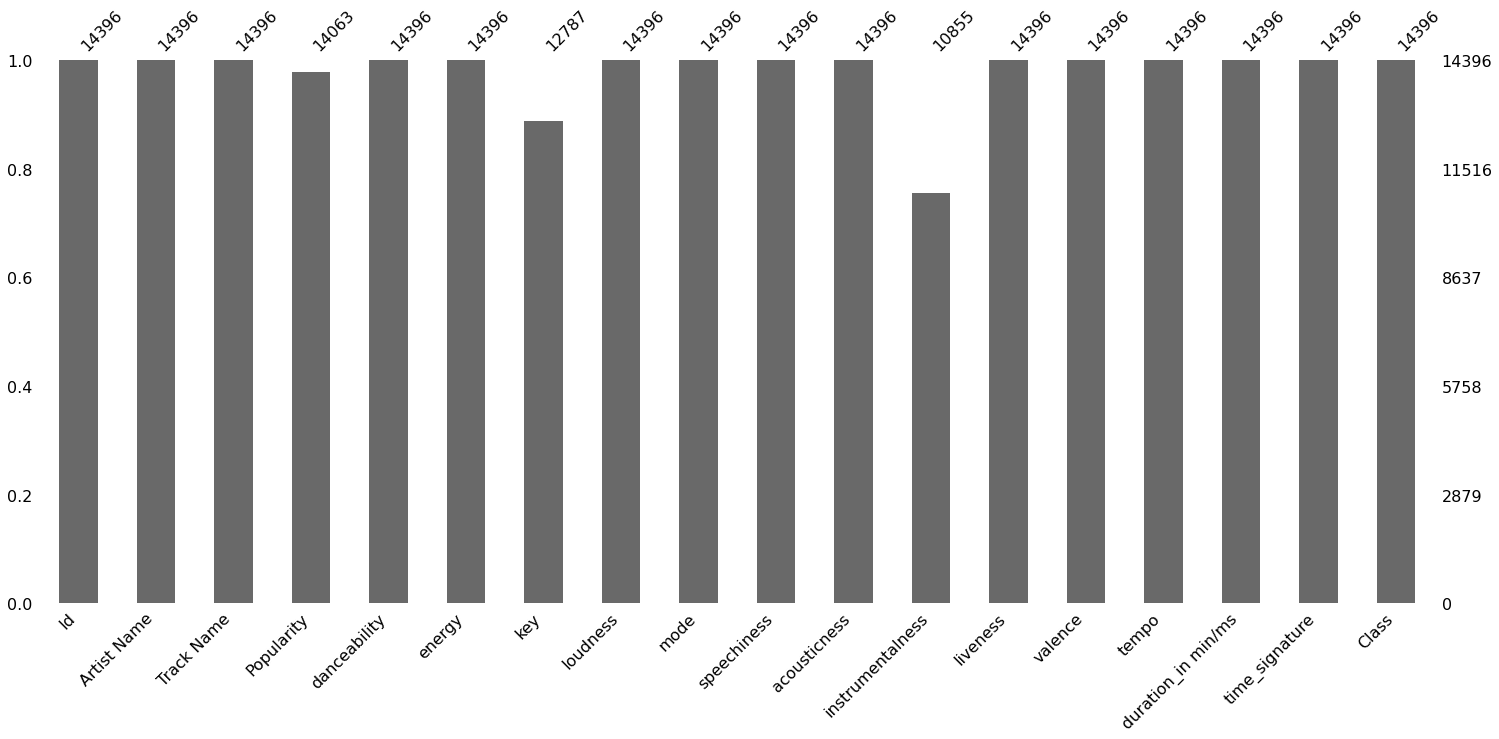

In [ ]:
import missingno as msno
msno.bar(data_train)

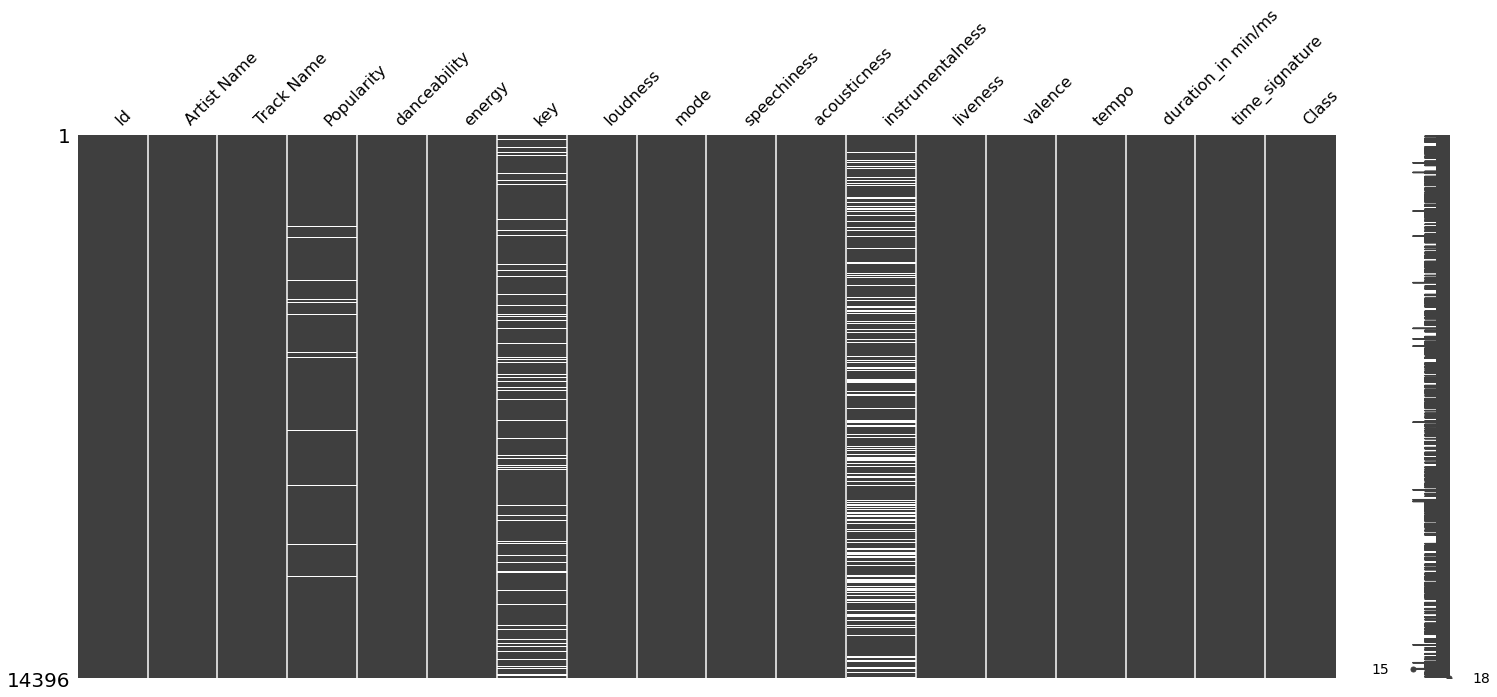

In [ ]:
# to know how the missing data is destributed
msno.matrix(data_train)

In [ ]:
train = data_train.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Artist Name'] = labelencoder.fit_transform(train['Artist Name'])
train['Track Name'] = labelencoder.fit_transform(train['Track Name'])

In [ ]:
# train = train.drop(['Id', 'Class'], axis=1)

In [ ]:
train.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

handling instrumentalness

In [ ]:
test_data_na = train[train["instrumentalness"].isnull()]

In [ ]:
train.dropna(inplace=True)

In [ ]:
x_train = train.drop("instrumentalness", axis=1)
x_test = test_data_na.drop("instrumentalness", axis=1)
y_train = train["instrumentalness"]

In [ ]:
x_test.dropna(inplace=True)

In [ ]:
x_test.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(x_train.shape, x_test.shape, y_pred.shape)

(9412, 17) (3083, 17) (3083,)


In [ ]:
print(type(x_train), type(x_test), type(y_pred))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [ ]:
prediction1 = pd.DataFrame({'instrumentalness': y_pred})

In [ ]:
prediction1.isna().sum()

instrumentalness    0
dtype: int64

In [ ]:
final_instrumentalness = pd.merge(x_test, prediction1, how="inner",on=x_test['Artist Name'])


In [ ]:
final_instrumentalness.shape

(12469, 19)

In [ ]:
final_instrumentalness.drop(final_instrumentalness[['key_0']], axis=1)

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,instrumentalness
0,1,4260,6755,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.3780,0.106,0.235,152.429,204947.000000,4,9,0.174848
1,5,1377,6441,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.1830,0.211,0.619,88.311,254145.000000,4,5,0.025836
2,9,1459,6446,38.0,0.446,0.816,9.0,-9.762,1,0.0766,0.3180,0.339,0.718,183.696,165293.000000,4,10,0.236575
3,15,3573,11393,70.0,0.571,0.618,10.0,-4.966,1,0.0445,0.1470,0.159,0.288,138.030,3.863867,4,4,-0.014172
4,19,6611,2171,10.0,0.232,0.895,2.0,-2.834,1,0.0517,0.6600,0.124,0.343,175.443,5.227267,4,0,0.228639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12464,14332,7605,3452,71.0,0.521,0.625,1.0,-7.470,1,0.0670,0.0301,0.121,0.136,101.019,334067.000000,4,5,0.157036
12465,14339,6712,8274,48.0,0.581,0.297,7.0,-7.681,1,0.0354,0.2510,0.123,0.329,95.691,3.695200,4,0,0.030522
12466,14343,6934,9172,63.0,0.619,0.637,2.0,-7.369,1,0.0286,0.0150,0.374,0.936,105.205,246307.000000,4,6,-0.031800
12467,14371,7310,5252,24.0,0.262,0.471,7.0,-7.795,1,0.0331,0.8240,0.109,0.270,170.356,6.357333,4,0,0.240589


handling key

In [ ]:
train = data_train.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Artist Name'] = labelencoder.fit_transform(train['Artist Name'])
train['Track Name'] = labelencoder.fit_transform(train['Track Name'])

In [ ]:
test_data_na_key= train[train["key"].isnull()]

In [ ]:
train.dropna(inplace=True)

In [ ]:
x_train = train.drop("key", axis=1)
x_test = test_data_na_key.drop("key", axis=1)
y_train = train["key"]

In [ ]:
x_test.dropna(inplace=True)

In [ ]:
x_test.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(x_train.shape, x_test.shape, y_pred.shape)

(9412, 17) (1205, 17) (1205,)


In [ ]:
prediction2 = pd.DataFrame({'key': y_pred})

In [ ]:
prediction2.isna().sum()

key    0
dtype: int64

In [ ]:
final_key = pd.merge(x_test, prediction2, how="inner",on=x_test['Artist Name'])

In [ ]:
final_key.shape

(1851, 19)

In [ ]:
final_key.isna().sum()

key_0                 0
Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
key                   0
dtype: int64

In [ ]:
final_key.drop(final_key[['key_0']], axis=1)

,Id,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,key
0,4,1750,6223,12.0,0.515,0.308,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.00000,3,2,5.713222
1,31,437,1971,34.0,0.620,0.848,-7.201,1,0.0391,0.354000,0.001030,0.6980,0.732,133.557,132880.00000,4,10,5.840685
2,63,6565,2760,52.0,0.524,0.265,-15.365,1,0.0282,0.933000,0.886000,0.1860,0.218,106.487,4.89950,3,7,5.465223
3,73,4193,10329,42.0,0.493,0.907,-4.058,1,0.0716,0.000133,0.004380,0.1310,0.258,120.047,292501.00000,4,8,5.629784
4,77,7386,840,29.0,0.299,0.941,-7.280,1,0.0478,0.000554,0.095300,0.0519,0.674,130.036,174000.00000,3,10,5.675788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,14330,2822,1599,37.0,0.590,0.141,-15.304,1,0.0347,0.907000,0.867000,0.0935,0.157,120.224,1.72550,4,7,5.410497
1847,14345,6787,6327,48.0,0.736,0.796,-6.020,0,0.0486,0.003610,0.102000,0.1970,0.742,93.986,316381.00000,4,10,6.596039
1848,14354,7254,7958,55.0,0.664,0.660,-5.284,1,0.2910,0.181000,0.000002,0.1900,0.470,90.106,261467.00000,4,5,5.616294
1849,14365,5804,9145,40.0,0.545,0.534,-7.531,0,0.0297,0.812000,0.000005,0.0972,0.476,94.014,4.47635,4,0,6.378603


In [ ]:
data_train.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [ ]:
s1 = {'Id':final_instrumentalness['Id'], 'Artist Name': final_instrumentalness['Artist Name'], 'Track Name': final_instrumentalness['Track Name'],
      'Popularity': final_instrumentalness['Popularity'],'danceability': final_instrumentalness['danceability'],
       'energy': final_instrumentalness['energy'], 'key': final_instrumentalness['key'], 'loudness': final_instrumentalness['loudness'], 'mode': final_instrumentalness['mode'],
       'speechiness': final_instrumentalness['speechiness'], 'acousticness': final_instrumentalness['acousticness'],
       'instrumentalness': final_instrumentalness['instrumentalness'],'liveness': final_instrumentalness['liveness'], 'valence': final_instrumentalness['valence'],
       'tempo': final_instrumentalness['tempo'],'duration_in min/ms':final_instrumentalness['duration_in min/ms'],'time_signature':final_instrumentalness['time_signature'],'Class':final_instrumentalness['Class']}

s2 = {'Id':final_key['Id'], 'Artist Name': final_key['Artist Name'], 'Track Name': final_key['Track Name'],'Popularity': final_key['Popularity'],'danceability': final_key['danceability'],
       'energy': final_key['energy'], 'key': final_key['key'], 'loudness': final_key['loudness'], 'mode': final_key['mode'],'speechiness': final_key['speechiness'], 'acousticness': final_key['acousticness'],
       'instrumentalness': final_key['instrumentalness'],'liveness': final_key['liveness'], 'valence': final_key['valence'],
       'tempo': final_key['tempo'],'duration_in min/ms':final_key['duration_in min/ms'],'time_signature':final_key['time_signature'],'Class':final_key['Class']}


df1 = pd.DataFrame(s1)
df2 = pd.DataFrame(s2)

In [ ]:
new_df = pd.merge(df1, df2,  how="outer", validate="one_to_one")

In [ ]:
new_df.shape

(14320, 18)

In [ ]:
new_df.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
new_df['Class'].value_counts()

9     7554
10    2634
5     1617
6      699
1      508
2      332
8      313
4      251
0      178
3      163
7       71
Name: Class, dtype: int64

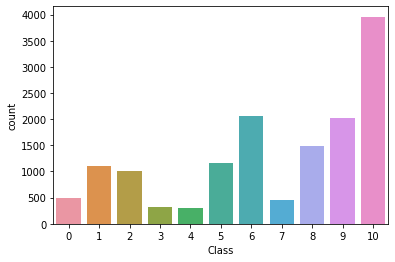

In [ ]:
sns.countplot(x='Class', data=data_train)

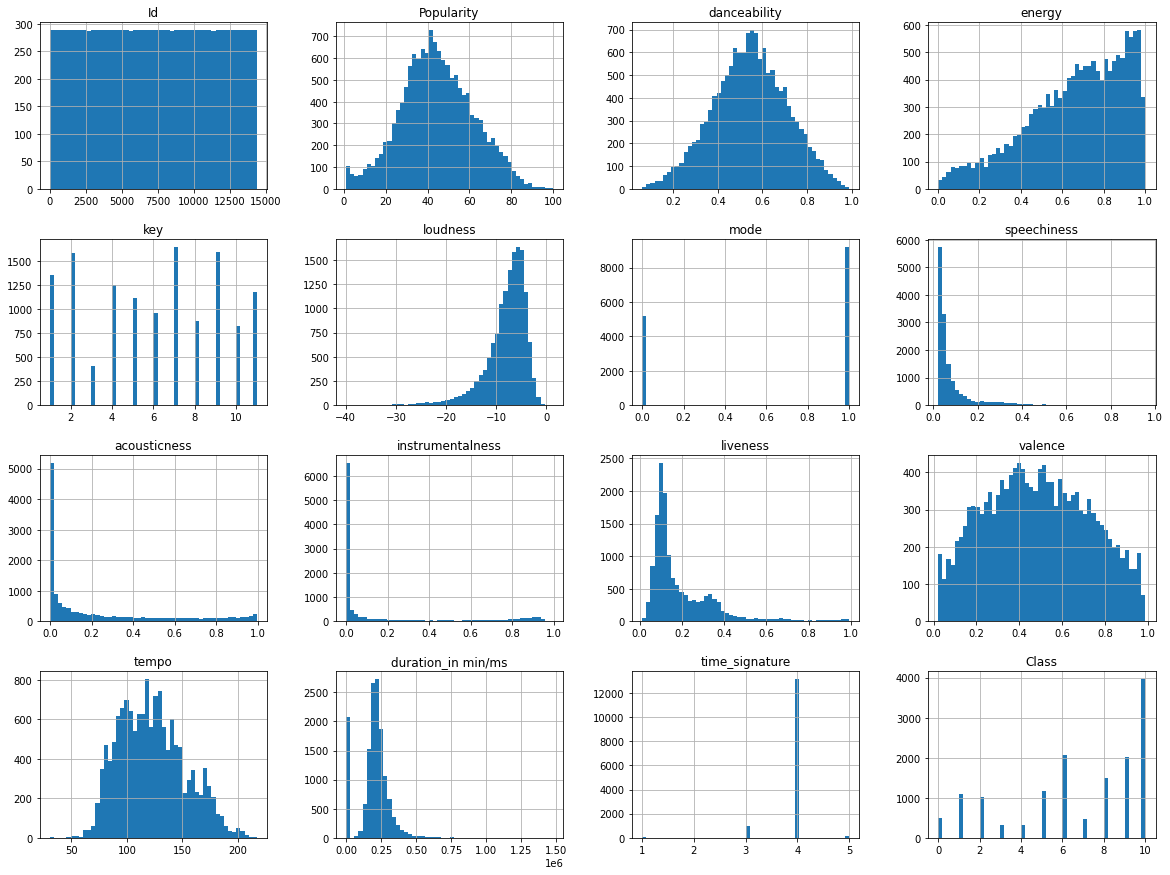

In [ ]:
data_train.hist(figsize=(20,15), bins=50)
plt.show()

In [ ]:
numerical_feature = data_train.select_dtypes(include=[np.number]).drop(['Id'], axis=1).columns
categorical_feature = data_train.select_dtypes(exclude=[np.number]).columns


In [ ]:
for i in numerical_feature:
  print(i)

Popularity
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_in min/ms
time_signature
Class


In [ ]:
numeric_features= numerical_feature.drop(['Class'])

In [ ]:
numeric_features

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature'],
      dtype='object')

In [ ]:
categorical_feature


Index(['Artist Name', 'Track Name'], dtype='object')

In [ ]:
corelation = data_train.corr()['Class'].sort_values(ascending=False)
corelation

Class                 1.000000
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.159484
liveness              0.040101
time_signature        0.040053
tempo                 0.034496
Id                    0.002703
key                  -0.004175
instrumentalness     -0.028631
mode                 -0.040092
speechiness          -0.062784
valence              -0.080036
danceability         -0.101152
acousticness         -0.240609
Name: Class, dtype: float64

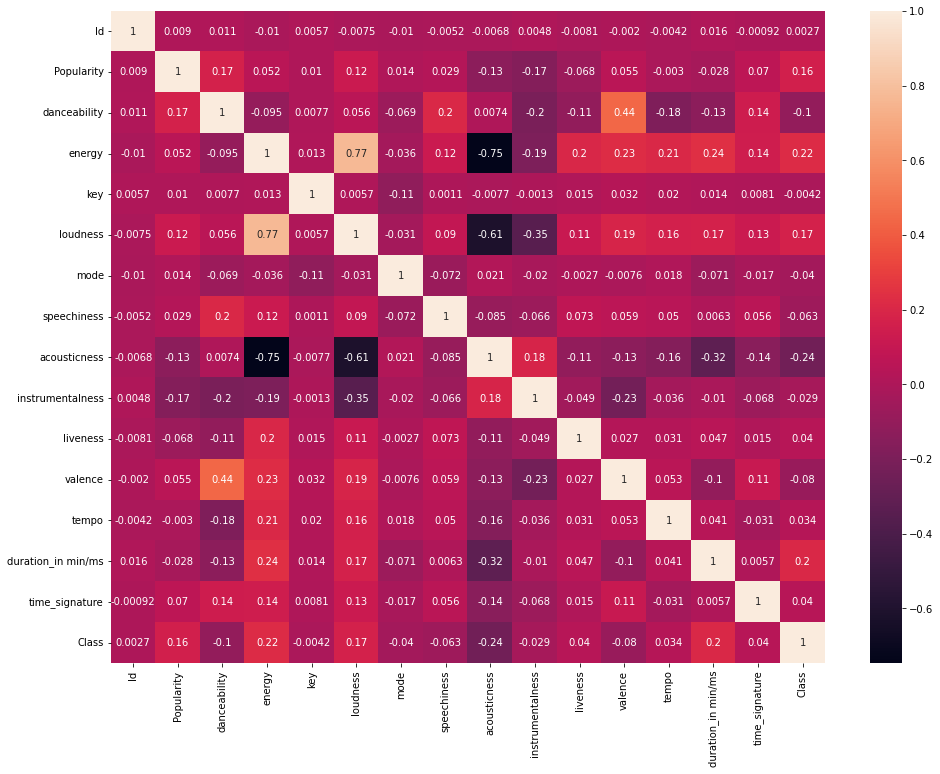

In [ ]:
heatm = data_train.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(heatm, annot=True)

**Outliers:**

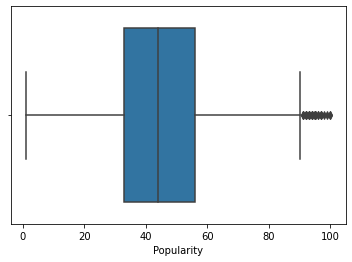

In [ ]:
sns.boxplot(x=data_train["Popularity"])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

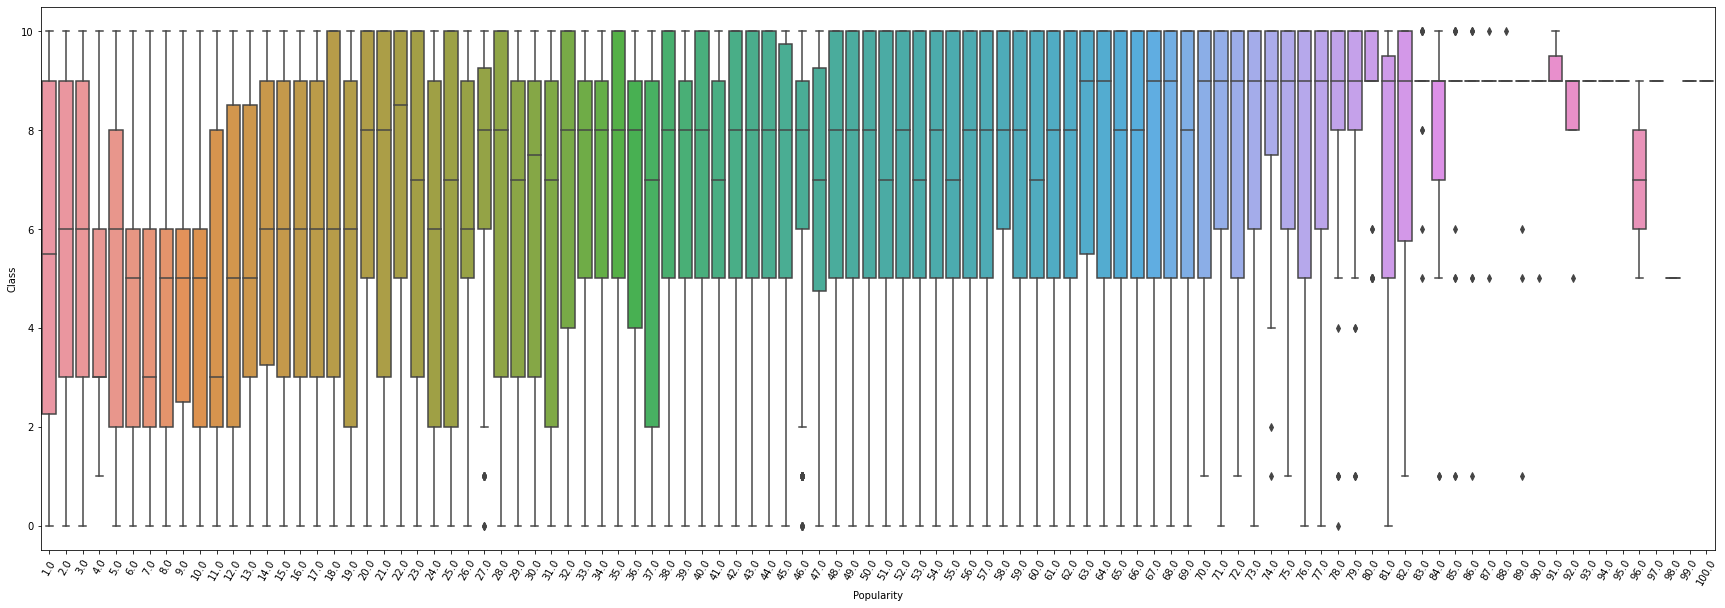

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data_train, x="Popularity", y="Class")
plt.xticks(rotation=60)

#### Z-score methode

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    print('mean = {}'.format(mean),'std = {}'.format(std))
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
# outliers in each column

for feature in data_train.select_dtypes(include=[np.number]):
  sample_outliers = detect_outliers_zscore(data_train[feature])

  print("Outliers from Z-scores method {}: ".format(feature), sample_outliers,)
  print("length for {} = ".format(feature),len(sample_outliers),'\n')


mean = 7198.5 std = 4155.767227600699
Outliers from Z-scores method Id:  []
length for Id =  0 

mean = 44.525207992604706 std = 17.418321112741907
Outliers from Z-scores method Popularity:  [100.0, 97.0, 97.0, 97.0, 98.0, 100.0, 99.0]
length for Popularity =  7 

mean = 0.5431053556543485 std = 0.16551126423806684
Outliers from Z-scores method danceability:  [100.0, 97.0, 97.0, 97.0, 98.0, 100.0, 99.0]
length for danceability =  7 

mean = 0.662421645595999 std = 0.23595928673718533
Outliers from Z-scores method energy:  [100.0, 97.0, 97.0, 97.0, 98.0, 100.0, 99.0]
length for energy =  7 

mean = 5.953781184015015 std = 3.199887636348311
Outliers from Z-scores method key:  [100.0, 97.0, 97.0, 97.0, 98.0, 100.0, 99.0]
length for key =  7 

mean = -7.900852181161434 std = 4.057221305366146
Outliers from Z-scores method loudness:  [100.0, 97.0, 97.0, 97.0, 98.0, 100.0, 99.0, -31.3, -30.707, -21.748, -31.385, -28.315, -22.094, -23.738, -21.114, -27.383, -28.639, -34.825, -30.252, -20.254,

#building a model:

In [ ]:
X = new_df.drop('Class', axis=1)
Y = new_df['Class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

##SVC

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [ ]:
#manually tune the class weight:
cw = {}
for l in set(Y_train):
    cw[l] = np.sum(Y_train == l)
    # if cw[l] <= 225:
    #   cw[l] = cw[l]*4
    # if cw[l] <= 350:
    #   cw[l] = cw[l]*4
    # elif cw[l] > 2000:
    #   cw[l] = cw[l]/2
print(cw)

{0: 350, 1: 769, 2: 713, 3: 225, 4: 217, 5: 810, 6: 1448, 7: 323, 8: 1038, 9: 1413, 10: 2771}


In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', class_weight='balanced'))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', gamma='auto'))])

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred, Y_test))
#class4, class3, class7, class0 less than 1000, class2, class1, class5, class8 less than 2000, class10 more than 2000 records
#this is unbalance data


              precision    recall  f1-score   support

           0       0.79      0.51      0.62        83
           1       0.59      0.26      0.36       347
           2       0.72      0.35      0.47       205
           3       0.82      0.74      0.78        54
           4       0.95      0.50      0.65       142
           5       0.89      0.75      0.81       580
           6       0.46      0.36      0.40       270
           7       0.76      0.84      0.80        19
           8       0.65      0.30      0.41       202
           9       0.80      0.96      0.88      1896
          10       0.42      0.66      0.51       498

    accuracy                           0.72      4296
   macro avg       0.71      0.57      0.61      4296
weighted avg       0.73      0.72      0.70      4296



In [ ]:
accuracy_score(y_pred, Y_test)

0.7155493482309124

##Decesion Tree:

In [ ]:
decesion_model = DecisionTreeClassifier(class_weight='balanced')
decesion_model.fit(X_train, Y_train)
prediction = decesion_model.predict(X_test)

In [ ]:
print(classification_report(prediction, Y_test))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        51
           1       0.63      0.58      0.61       167
           2       0.57      0.61      0.59        93
           3       0.80      0.81      0.80        48
           4       0.81      0.91      0.86        67
           5       0.85      0.87      0.86       471
           6       0.60      0.62      0.61       203
           7       0.86      0.78      0.82        23
           8       0.55      0.63      0.59        83
           9       0.95      0.95      0.95      2277
          10       0.81      0.79      0.80       813

    accuracy                           0.86      4296
   macro avg       0.74      0.76      0.75      4296
weighted avg       0.86      0.86      0.86      4296



In [ ]:
test_data_acc = accuracy_score(prediction, Y_test)
print('accuracy score of the test data : ', test_data_acc)

accuracy score of the test data :  0.861731843575419


##Random Forests:

In [ ]:
forest_model = RandomForestClassifier(class_weight='balanced')
forest_model.fit(X_train, Y_train)
prediction = forest_model.predict(X_test)

In [ ]:
print(classification_report(prediction, Y_test))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68        44
           1       0.05      0.70      0.09        10
           2       0.38      0.62      0.47        61
           3       0.82      0.85      0.83        47
           4       0.77      0.83      0.80        70
           5       0.85      0.81      0.83       508
           6       0.12      0.57      0.20        44
           7       0.90      0.86      0.88        22
           8       0.33      0.61      0.43        51
           9       0.92      0.90      0.91      2328
          10       0.82      0.59      0.68      1111

    accuracy                           0.79      4296
   macro avg       0.60      0.74      0.62      4296
weighted avg       0.86      0.79      0.82      4296



In [ ]:
training_data_accuracy = accuracy_score(prediction, Y_test)
print('accuracy score of the test data : ', training_data_accuracy)

accuracy score of the test data :  0.7930633147113594


####make a submission

In [ ]:
data_test

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,17992,Within Temptation,Stand My Ground,55.0,0.271,0.866,5.0,-4.072,0,0.0578,0.048900,0.000762,0.1160,0.127,175.665,267987.0,4
3596,17993,Dikla,◊©◊ë◊ï◊¢◊ô◊ô◊ù,38.0,0.598,0.690,5.0,-4.758,0,0.3030,0.363000,NaN,0.0519,0.653,187.934,198300.0,4
3597,17994,Cut Copy,Hearts On Fire - Calvin Harris Remix,18.0,0.783,0.820,1.0,-6.102,1,0.0489,0.000540,0.499000,0.0628,0.235,129.015,339213.0,4
3598,17995,Jethro Tull,Thick as a Brick - Edit #1,38.0,0.443,0.401,5.0,-13.997,1,0.0426,0.263000,NaN,0.1680,0.751,168.209,182587.0,3


processing test data

In [ ]:
test = data_test.copy()

In [ ]:
test['Popularity'].fillna(test['Popularity'].mean(), inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test['Artist Name'] = labelencoder.fit_transform(test['Artist Name'])
test['Track Name'] = labelencoder.fit_transform(test['Track Name'])

In [ ]:
test.isna().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity              0
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

handling instrumentalness

In [ ]:
test_data_naa = test[test["instrumentalness"].isnull()]

In [ ]:
test.dropna(inplace=True)

In [ ]:
x_train = test.drop("instrumentalness", axis=1)
x_test = test_data_naa.drop("instrumentalness", axis=1)
y_train = test["instrumentalness"]

In [ ]:
x_test.dropna(inplace=True)

In [ ]:
x_test.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(x_train.shape, x_test.shape, y_pred.shape)

(2463, 16) (732, 16) (732,)


In [ ]:
prediction3 = pd.DataFrame({'instrumentalness': y_pred})

In [ ]:
prediction3.isna().sum()

instrumentalness    0
dtype: int64

In [ ]:
final_instrumentalness_test = pd.merge(x_test, prediction3, how="inner",on=x_test['Artist Name'])


In [ ]:
final_instrumentalness_test.shape

(1090, 18)

In [ ]:
final_instrumentalness_test.drop(final_instrumentalness_test[['key_0']], axis=1)

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,instrumentalness
0,14399,1803,1147,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.87200,0.1140,0.298,103.971,232533.0,4,0.096353
1,14401,1773,3301,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.14700,0.0672,0.805,76.030,118439.0,4,0.037527
2,14403,143,3043,73.0,0.348,0.875,11.0,-4.758,0,0.1990,0.03410,0.1170,0.407,169.152,202133.0,4,0.066989
3,14403,143,3043,73.0,0.348,0.875,11.0,-4.758,0,0.1990,0.03410,0.1170,0.407,169.152,202133.0,4,0.146371
4,14403,143,3043,73.0,0.348,0.875,11.0,-4.758,0,0.1990,0.03410,0.1170,0.407,169.152,202133.0,4,-0.054029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,17941,2766,1668,47.0,0.586,0.893,1.0,-3.494,0,0.1570,0.06760,0.2550,0.492,89.930,178793.0,4,0.029438
1086,17971,2687,1879,41.0,0.471,0.802,4.0,-5.037,0,0.0642,0.00309,0.3610,0.406,82.332,183720.0,4,0.108208
1087,17973,1675,206,49.0,0.616,0.753,7.0,-5.912,1,0.0485,0.10600,0.2670,0.553,85.002,178932.0,4,0.079016
1088,17993,600,3271,38.0,0.598,0.690,5.0,-4.758,0,0.3030,0.36300,0.0519,0.653,187.934,198300.0,4,-0.062767


handling key

In [ ]:
test = data_test.copy()

In [ ]:
test['Popularity'].fillna(test['Popularity'].mean(), inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test['Artist Name'] = labelencoder.fit_transform(test['Artist Name'])
test['Track Name'] = labelencoder.fit_transform(test['Track Name'])

In [ ]:
test_data_na_key1= test[test["key"].isnull()]

In [ ]:
test.dropna(inplace=True)

In [ ]:
x_train = test.drop("key", axis=1)
x_test = test_data_na_key1.drop("key", axis=1)
y_train = test["key"]

In [ ]:
x_test.dropna(inplace=True)

In [ ]:
x_test.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print(x_train.shape, x_test.shape, y_pred.shape)

(2463, 16) (301, 16) (301,)


In [ ]:
prediction4 = pd.DataFrame({'key': y_pred})

In [ ]:
prediction4.isna().sum()

key    0
dtype: int64

In [ ]:
final_key_test = pd.merge(x_test, prediction4, how="inner",on=x_test['Artist Name'])

In [ ]:
final_key_test.shape

(327, 18)

In [ ]:
final_key_test.isna().sum()

key_0                 0
Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
key                   0
dtype: int64

In [ ]:
final_key_test.drop(final_key[['key_0']], axis=1)

,Id,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,key
0,14400,2609,709,52.0,0.480,0.8260,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.6870,96.000,222053.000000,4,5.728633
1,14413,1216,2650,37.0,0.887,0.8550,-6.210,1,0.1860,0.146000,0.000037,0.1090,0.6700,116.982,188777.000000,4,5.951317
2,14419,2469,631,37.0,0.489,0.5930,-6.912,1,0.0312,0.353000,0.032100,0.1430,0.3570,125.016,279081.000000,4,5.484661
3,14422,2443,2296,94.0,0.650,0.8250,-4.645,1,0.0325,0.021500,0.000024,0.0936,0.5930,118.091,3.183567,4,5.594283
4,14462,925,2187,42.0,0.523,0.9830,-3.421,1,0.1960,0.001240,0.000003,0.0728,0.4040,139.017,272121.000000,4,5.796224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,17958,1195,1860,48.0,0.506,0.9070,-4.011,1,0.0391,0.000019,0.336000,0.5730,0.5470,156.050,188853.000000,4,5.931945
323,17961,783,1803,55.0,0.115,0.2570,-14.611,0,0.0349,0.805000,0.819000,0.1840,0.0725,93.784,530894.000000,4,6.127161
324,17969,2056,561,51.0,0.543,0.9270,-5.209,1,0.0755,0.000342,0.543000,0.0327,0.3540,120.097,182333.000000,4,5.724735
325,17987,1110,1470,34.0,0.620,0.0827,-20.880,1,0.0625,0.368000,0.051000,0.0621,0.4240,145.108,437573.000000,3,5.553966


In [ ]:
data_test.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature'],
      dtype='object')

In [ ]:
s_1 = {'Id':final_instrumentalness_test['Id'], 'Artist Name': final_instrumentalness_test['Artist Name'], 'Track Name': final_instrumentalness_test['Track Name'],
      'Popularity': final_instrumentalness_test['Popularity'],'danceability': final_instrumentalness_test['danceability'],
       'energy': final_instrumentalness_test['energy'], 'key': final_instrumentalness_test['key'], 'loudness': final_instrumentalness_test['loudness'], 'mode': final_instrumentalness_test['mode'],
       'speechiness': final_instrumentalness_test['speechiness'], 'acousticness': final_instrumentalness_test['acousticness'],
       'instrumentalness': final_instrumentalness_test['instrumentalness'],'liveness': final_instrumentalness_test['liveness'], 'valence': final_instrumentalness_test['valence'],
       'tempo': final_instrumentalness_test['tempo'],'duration_in min/ms':final_instrumentalness_test['duration_in min/ms'],'time_signature':final_instrumentalness_test['time_signature']}

s_2 = {'Id':final_key_test['Id'], 'Artist Name': final_key_test['Artist Name'], 'Track Name': final_key_test['Track Name'],'Popularity': final_key_test['Popularity'],'danceability': final_key_test['danceability'],
       'energy': final_key_test['energy'], 'key': final_key_test['key'], 'loudness': final_key_test['loudness'], 'mode': final_key_test['mode'],'speechiness': final_key_test['speechiness'], 'acousticness': final_key_test['acousticness'],
       'instrumentalness': final_key_test['instrumentalness'],'liveness': final_key_test['liveness'], 'valence': final_key_test['valence'],
       'tempo': final_key_test['tempo'],'duration_in min/ms':final_key_test['duration_in min/ms'],'time_signature':final_key_test['time_signature']}


df_1 = pd.DataFrame(s_1)
df_2 = pd.DataFrame(s_2)

In [ ]:
new_df_test = pd.merge(df_1, df_2,  how="outer", validate="one_to_one")

In [ ]:
new_df_test.shape

(1417, 17)

In [ ]:
new_df_test.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [ ]:
new_df_test

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14399,1803,1147,80.0,0.656,0.2910,2.000000,-10.572,1,0.0293,0.872000,0.096353,0.1140,0.2980,103.971,232533.0,4
1,14401,1773,3301,23.0,0.734,0.7290,1.000000,-6.381,0,0.2830,0.147000,0.037527,0.0672,0.8050,76.030,118439.0,4
2,14403,143,3043,73.0,0.348,0.8750,11.000000,-4.758,0,0.1990,0.034100,0.066989,0.1170,0.4070,169.152,202133.0,4
3,14403,143,3043,73.0,0.348,0.8750,11.000000,-4.758,0,0.1990,0.034100,0.146371,0.1170,0.4070,169.152,202133.0,4
4,14403,143,3043,73.0,0.348,0.8750,11.000000,-4.758,0,0.1990,0.034100,-0.054029,0.1170,0.4070,169.152,202133.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,17958,1195,1860,48.0,0.506,0.9070,5.931945,-4.011,1,0.0391,0.000019,0.336000,0.5730,0.5470,156.050,188853.0,4
1413,17961,783,1803,55.0,0.115,0.2570,6.127161,-14.611,0,0.0349,0.805000,0.819000,0.1840,0.0725,93.784,530894.0,4
1414,17969,2056,561,51.0,0.543,0.9270,5.724735,-5.209,1,0.0755,0.000342,0.543000,0.0327,0.3540,120.097,182333.0,4
1415,17987,1110,1470,34.0,0.620,0.0827,5.553966,-20.880,1,0.0625,0.368000,0.051000,0.0621,0.4240,145.108,437573.0,3


In [ ]:
prediction_test = forest_model.predict(new_df_test)

In [ ]:
submission = pd.DataFrame({'Id':new_df_test['Id'], 'Class':prediction_test})

In [ ]:
submission

,Id,Class
0,14399,9
1,14401,5
2,14403,6
3,14403,6
4,14403,6
...,...,...
1350,17958,1
1351,17961,6
1352,17969,10
1353,17987,2


In [ ]:
from google.colab import files

submission.to_csv('submission.csv', encoding = 'utf-8-sig', index=False,header = 1)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_test.shape

(3600, 17)

In [ ]:
submission.duplicated().sum()

335

In [ ]:
submission.shape

(1355, 2)

In [ ]:
submission.isna().sum()

Id       0
Class    0
dtype: int64

##KNN:

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, Y_train)
prediction = knn_model.predict(X_test)

In [ ]:
print(classification_report(prediction, Y_test))

              precision    recall  f1-score   support

           0       0.26      0.37      0.31        38
           1       0.09      0.24      0.13        58
           2       0.06      0.22      0.09        27
           3       0.37      0.43      0.40        42
           4       0.27      0.37      0.31        54
           5       0.42      0.40      0.41       511
           6       0.11      0.24      0.16        99
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        13
           9       0.89      0.80      0.84      2546
          10       0.53      0.46      0.49       908

    accuracy                           0.64      4296
   macro avg       0.27      0.32      0.29      4296
weighted avg       0.71      0.64      0.67      4296



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(prediction, Y_test)

0.638733705772812

##XGBClassifire:

In [ ]:
sw = {}
for l in set(Y_train):
    sw[l] = np.sum(Y_train == l)
print(sw)

{0: 125, 1: 355, 2: 232, 3: 114, 4: 176, 5: 1132, 6: 489, 7: 50, 8: 219, 9: 5288, 10: 1844}


In [ ]:
xgb_model = XGBClassifier(sample_weight=sw)
xgb_model.fit(X_train, Y_train)
prediction = xgb_model.predict(X_test)

In [ ]:
print(classification_report(prediction, Y_test))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68        44
           1       0.05      0.70      0.09        10
           2       0.38      0.62      0.47        61
           3       0.82      0.85      0.83        47
           4       0.77      0.83      0.80        70
           5       0.85      0.81      0.83       508
           6       0.12      0.57      0.20        44
           7       0.90      0.86      0.88        22
           8       0.33      0.61      0.43        51
           9       0.92      0.90      0.91      2328
          10       0.82      0.59      0.68      1111

    accuracy                           0.79      4296
   macro avg       0.60      0.74      0.62      4296
weighted avg       0.86      0.79      0.82      4296



In [ ]:
accuracy_score(prediction, Y_test)

0.7930633147113594

##SGDClassifire:



```
# This classifier make a bad prediction because this model for binary classification and our problem multicalss classification
```



In [ ]:
sgd_model = SGDClassifier(class_weight=sw)
sgd_model.fit(X_train, Y_train)
prediction = sgd_model.predict(X_test)

In [ ]:
print(classification_report(prediction, Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.14      0.25      4319
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.14      4319
   macro avg       0.09      0.01      0.02      4319
weighted avg       1.00      0.14      0.25      4319



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(prediction, Y_test)

0.27506367214633015

##GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=2, random_state=20)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.7700186219739292

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        46
           1       0.05      0.35      0.08        20
           2       0.35      0.71      0.47        49
           3       0.78      0.86      0.82        44
           4       0.59      0.73      0.65        60
           5       0.82      0.83      0.82       479
           6       0.08      0.46      0.14        37
           7       0.76      0.73      0.74        22
           8       0.37      0.50      0.43        70
           9       0.92      0.87      0.89      2416
          10       0.75      0.56      0.64      1053

    accuracy                           0.77      4296
   macro avg       0.56      0.67      0.58      4296
weighted avg       0.83      0.77      0.79      4296



##ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(class_weight='balanced')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8945530726256983

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        50
           1       0.63      0.82      0.72       118
           2       0.50      0.79      0.61        63
           3       0.84      0.95      0.89        43
           4       0.89      0.96      0.92        70
           5       0.94      0.91      0.92       499
           6       0.60      0.84      0.70       150
           7       0.90      0.90      0.90        21
           8       0.48      0.78      0.59        58
           9       0.97      0.95      0.96      2324
          10       0.89      0.78      0.84       900

    accuracy                           0.89      4296
   macro avg       0.76      0.86      0.80      4296
weighted avg       0.91      0.89      0.90      4296



# this is the first try (preprocessing)

##Data pre-processing

**handling outliers**

training data

In [ ]:
numeric_features

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature'],
      dtype='object')

In [ ]:
null = ['Popularity', 'key', 'instrumentalness']
for i in null:
  data_train[i].fillna(data_train[i].mean(), axis=0, inplace=True)


In [ ]:
data_train.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
for x in ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_in min/ms', 'time_signature']:
    q75,q25 = np.percentile(data_train.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_train.loc[data_train[x] < min,x] = np.nan
    data_train.loc[data_train[x] > max,x] = np.nan

In [ ]:
data_train.isnull().sum()


Id                       0
Artist Name              0
Track Name               0
Popularity              32
danceability            29
energy                   0
key                      0
loudness               648
mode                     0
speechiness           1633
acousticness             0
instrumentalness      2077
liveness               767
valence                  0
tempo                   32
duration_in min/ms    2583
time_signature        1247
Class                    0
dtype: int64

In [ ]:
# data_train.dropna(axis=0, inplace=True)
for x in ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_in min/ms', 'time_signature']:
   data_train[x].fillna(data_train[x].median(), axis=0 ,inplace=True)


In [ ]:
data_train.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

test data

In [ ]:
print(numeric_features)
print(categorical_feature)

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature'],
      dtype='object')
Index(['Artist Name', 'Track Name'], dtype='object')


In [ ]:
data_test.isna().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [ ]:
for i in null:
  data_test[i].fillna(data_test[i].mean(), axis=0, inplace=True)

In [ ]:
for x in ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_in min/ms', 'time_signature']:
    q75,q25 = np.percentile(data_test.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data_test.loc[data_test[x] < min,x] = np.nan
    data_test.loc[data_test[x] > max,x] = np.nan

In [ ]:
data_test.isna().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity              9
danceability            4
energy                  0
key                     0
loudness              169
mode                    0
speechiness           403
acousticness            0
instrumentalness      517
liveness              191
valence                 0
tempo                   6
duration_in min/ms    658
time_signature        298
dtype: int64

In [ ]:
# data_train.dropna(axis=0, inplace=True)
for x in ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_in min/ms', 'time_signature']:
   data_test[x].fillna(data_test[x].median(), axis=0 ,inplace=True)


In [ ]:
data_test.isna().sum()

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

**handling categorical data**

train data

In [ ]:
categorical_feature

Index(['Artist Name', 'Track Name'], dtype='object')

In [ ]:
data_train['Artist Name'].unique()

array(['Marina Maximilian', 'The Black Keys', 'Royal & the Serpent', ...,
       'Cold Years', 'The Jaded Hearts Club', 'Freddy Fender'],
      dtype=object)

In [ ]:
data_train['Track Name'].unique()

array(['Not Afraid', "Howlin' for You", 'phuck u', ..., 'Too Far Gone',
       "Reach Out I'll Be There", 'Before the Next Teardrop Falls'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_train['Artist Name'] = labelencoder.fit_transform(data_train['Artist Name'])
data_train['Track Name'] = labelencoder.fit_transform(data_train['Track Name'])

In [ ]:
data_train.shape

(14396, 18)

In [ ]:
data_train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,4260,6755,37.000000,0.334,0.536,9.000000,-6.649,0.0,0.0381,0.378000,0.178129,0.106,0.235,152.429,204947.0,4.0,9
1,2,6558,4263,67.000000,0.725,0.747,11.000000,-5.545,1.0,0.0876,0.027200,0.046800,0.104,0.380,132.921,191956.0,4.0,6
2,3,5639,11474,44.525208,0.584,0.804,7.000000,-6.094,1.0,0.0619,0.000968,0.011000,0.284,0.635,159.953,161037.0,4.0,10
3,4,1750,6223,12.000000,0.515,0.308,5.953781,-14.711,1.0,0.0312,0.907000,0.021300,0.300,0.501,172.472,298093.0,4.0,2
4,5,1377,6441,48.000000,0.565,0.777,6.000000,-5.096,0.0,0.0435,0.183000,0.178129,0.211,0.619,88.311,254145.0,4.0,5


test data

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_test['Artist Name'] = labelencoder.fit_transform(data_test['Artist Name'])
data_test['Track Name'] = labelencoder.fit_transform(data_test['Track Name'])

In [ ]:
data_test.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,1159,1714,44.459629,0.691,0.670,2.000000,-7.093,0.0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4.0
1,14398,1205,207,14.000000,0.461,0.777,2.000000,-7.469,1.0,0.0306,0.388000,0.008520,0.2910,0.525,163.043,283909.0,4.0
2,14399,1803,1147,80.000000,0.656,0.291,2.000000,-10.572,1.0,0.0293,0.872000,0.175336,0.1140,0.298,103.971,232533.0,4.0
3,14400,2609,709,52.000000,0.480,0.826,5.947105,-4.602,1.0,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4.0
4,14401,1773,3301,23.000000,0.734,0.729,1.000000,-6.381,0.0,0.0444,0.147000,0.175336,0.0672,0.805,76.030,118439.0,4.0


###split the data_train

In [ ]:
X = data_train.drop('Class', axis=1)
Y = data_train['Class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)